# Q12  By MSahil

Using a dataset of recommendations, build machine-learning models that recommend articles to a new user. Specifically, build online learning models and supervised learning models, and compare the results. First, build three multi-armed bandits using Epsilon greedy, UCB1, and Thompson Sampling algorithms. You may use only two features from the dataset: ‘Recommendation’ and ‘Reward’. Second, build contextual bandits using the reward and historical data provided. Third, build three classification models using the features ‘Age’ and ‘Gender’ to predict recommendations for the new user. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('SimulatedArticleData.csv', index_col=[0])
data.head()

,Gender,Age,Recommendation,Reward
0,m,29.0,health,0
1,m,28.0,movies,1
2,m,34.0,news,1
3,m,36.0,health,0
4,f,24.0,news,0


In [3]:
msk = np.random.rand(len(data)) < 0.8
dataset = data[msk]
test = data[~msk]
dataset.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [4]:
dataset.head()

,Gender,Age,Recommendation,Reward
0,m,29.0,health,0
1,m,28.0,movies,1
2,m,36.0,health,0
3,f,24.0,news,0
4,f,61.0,sports,0


In [5]:
DF = dataset[['Recommendation','Reward']]
N = len(DF) # number of trail
DF.head()

,Recommendation,Reward
0,health,0
1,movies,1
2,health,0
3,news,0
4,sports,0


In [6]:
Arms = dataset['Recommendation'].unique().tolist()
dec = {Arms[0]:1,
       Arms[1]:1,
       Arms[2]:1,
       Arms[3]:1,
}

In [7]:
Arms

['health', 'movies', 'news', 'sports']

In [8]:
dec

{'health': 1, 'movies': 1, 'news': 1, 'sports': 1}

# Implementing Epsilon Greedy

In [9]:
ads_selected = []
numbers_of_selections = dec.copy()
sums_of_rewards = dec.copy()
total_reward = 0

eps = 0.4 
for n in range(0, N):

    if np.random.random() < eps:
       
        ad = np.random.choice(Arms)
    else:
        ad = max(sums_of_rewards, key=sums_of_rewards.get)
    
    ads_selected.append(ad)
    
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = DF.Reward[n]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

# Visualising the results

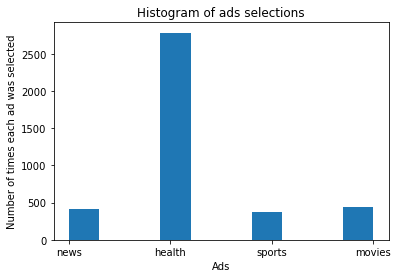

In [10]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

In [11]:
pd.Series(ads_selected).value_counts()

health    2784
movies     440
news       413
sports     370
dtype: int64

# On Testing dataset

In [12]:
testEG = test.copy()
testEG['prediction'] = pd.Series(ads_selected).value_counts().idxmax()
testEG["Recommendation"] = testEG["Recommendation"].astype('category')
testEG["prediction"] = testEG["prediction"].astype('category')
testEG["prediction"] = testEG["prediction"].cat.codes
testEG["Recommendation"] = testEG["Recommendation"].cat.codes
accuracy_score(testEG["Recommendation"] , testEG["prediction"])

0.2588116817724068

# Upper Confidence Bound (UCB)

In [13]:
import math
ads_selected = []
numbers_of_selections = dec.copy()
sums_of_rewards = dec.copy()
Total_upper_bound = dec.copy()
total_reward = 0
for n in range(200):
   
    ad = np.random.choice(Arms) 
    ads_selected.append(ad)   
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = DF.Reward[n]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward
    
    
for n in range(200, N):
    average_reward = sums_of_rewards[ad] / numbers_of_selections[ad]
   
    delta_i = math.sqrt((math.log(n + 1))/numbers_of_selections[ad])
    upper_bound = average_reward + delta_i
    Total_upper_bound[ad] = Total_upper_bound[ad] + upper_bound

    ad = max(Total_upper_bound, key=Total_upper_bound.get)   
    ads_selected.append(ad)
    
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = DF.Reward[n]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

# Visualising the results

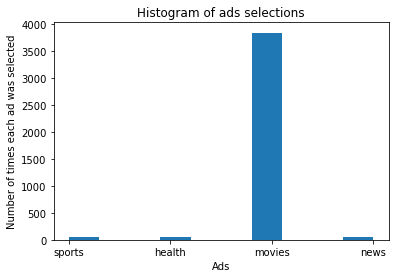

In [14]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

In [15]:
pd.Series(ads_selected).value_counts()

movies    3845
health      60
sports      54
news        48
dtype: int64

In [16]:
testUCB = test.copy()
testUCB['prediction'] = pd.Series(ads_selected).value_counts().idxmax()
testUCB["Recommendation"] = testUCB["Recommendation"].astype('category')
testUCB["prediction"] = testUCB["prediction"].astype('category')
testUCB["prediction"] = testUCB["prediction"].cat.codes
testUCB["Recommendation"] = testUCB["Recommendation"].cat.codes
accuracy_score(testUCB["Recommendation"] , testUCB["prediction"])

0.2588116817724068

# Thompson Sampling

In [17]:
import random
ads_selected = []
numbers_of_rewards_S = dec.copy()
numbers_of_rewards_F = dec.copy()
BetaArms = dec.copy()

total_reward = 0

ad = 'news'

for n in range(0, N):
    for key in dec:
        
        BetaArms[key] = (np.random.beta(numbers_of_rewards_S[key] + 1, numbers_of_rewards_F[key] + 1)) 
    ad = max(BetaArms, key=BetaArms.get) 
        
    ads_selected.append(ad)
    
    
    reward = DF.Reward[n]
    if reward == 1:
        numbers_of_rewards_S[ad] = numbers_of_rewards_S[ad] + 1
    else:
        numbers_of_rewards_F[ad] = numbers_of_rewards_F[ad] + 1
    total_reward = total_reward + reward

# Visualising the results - Histogram

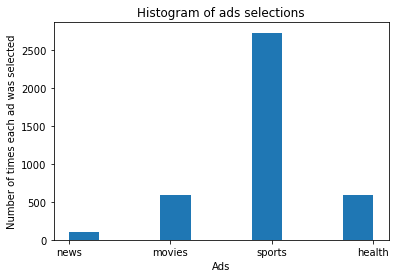

In [18]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

In [19]:
pd.Series(ads_selected).value_counts()

sports    2730
movies     588
health     587
news       102
dtype: int64

In [20]:
testTS = test.copy()
testTS['prediction'] = pd.Series(ads_selected).value_counts().idxmax()
testTS["Recommendation"] = testTS["Recommendation"].astype('category')
testTS["prediction"] = testTS["prediction"].astype('category')
testTS["prediction"] = testTS["prediction"].cat.codes
testTS["Recommendation"] = testTS["Recommendation"].cat.codes
accuracy_score(testTS["Recommendation"] , testTS["prediction"])

0.2588116817724068

# Contextual bandit

In [21]:
len(Arms)

4

In [22]:
dfContBand = dataset.copy()

In [23]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(dfContBand['Recommendation'])
dfContBand['Recommendation'] = le.transform(dfContBand['Recommendation'])
le.classes_

array(['health', 'movies', 'news', 'sports'], dtype=object)

In [24]:
le.inverse_transform([0, 1, 2, 3])

array(['health', 'movies', 'news', 'sports'], dtype=object)

In [25]:
dfContBand['probability'] = 0.5
dfContBand['cost'] = 0 - dfContBand['Reward']
dfContBand.head()

,Gender,Age,Recommendation,Reward,probability,cost
0,m,29.0,0,0,0.5,0
1,m,28.0,1,1,0.5,-1
2,m,36.0,0,0,0.5,0
3,f,24.0,2,0,0.5,0
4,f,61.0,3,0,0.5,0


# Build the Model

In [26]:
!pip install vowpalwabbit

In [27]:
from vowpalwabbit import pyvw

vw = pyvw.vw("--cb 4") 

C:\Users\muskan\AppData\Local\Temp/ipykernel_14884/1975050073.py:3: DeprecationWarning: vw has been renamed to Workspace, the alias will be removed in the future
  vw = pyvw.vw("--cb 4")


In [28]:
# Define the parameters

for i in dfContBand.index:
  action = dfContBand.loc[i, "Recommendation"]
  cost = dfContBand.loc[i, "cost"]
  probability = dfContBand.loc[i, "probability"]
  Gender = dfContBand.loc[i, "Gender"]
  Age = dfContBand.loc[i, "Age"]

  
  learn_example = str(action) + ":" + str(cost) + ":" + str(probability) +  " | " + str(Gender) + " " + str(Age)
#
 

In [29]:
print("Show action number ", le.inverse_transform([vw.predict('|m 29')]))

Show action number  ['movies']


In [30]:
le.inverse_transform([3])

array(['sports'], dtype=object)

In [31]:
dstwst = dataset[['Gender','Age']]

In [32]:
target = []
dstwst=test.copy()
for j in dstwst.index:
    Gender = dstwst.loc[j, "Gender"]
    Age = dstwst.loc[j, "Age"]
    test_example = "| " + str(Gender) + " " + str(Age)
    choice = vw.predict(test_example)
    target.append(choice)
dstwst['prediction'] = le.inverse_transform(target)

In [33]:
dstwst.head()

,Gender,Age,Recommendation,Reward,prediction
0,m,34.0,news,1,movies
1,m,73.0,news,0,movies
2,f,71.0,sports,0,movies
3,f,22.0,health,0,movies
4,f,74.0,movies,0,movies


In [34]:
dstwst["Recommendation"] = dstwst["Recommendation"].astype('category')
dstwst["Recommendation"] = dstwst["Recommendation"].cat.codes
dstwst["prediction"] = dstwst["prediction"].astype('category')
dstwst["prediction"] = dstwst["prediction"].cat.codes
accuracy_score(dstwst["Recommendation"] , dstwst["prediction"])

0.2588116817724068

In [35]:
vw.predict("| f 30.0")

1

# Classification

In [36]:
dataset = dataset[dataset['Reward'] == 1]

In [37]:
training = dataset[['Gender','Age','Recommendation']].copy()
testing = test[['Gender','Age','Recommendation']].copy()

training["Recommendation"] = training["Recommendation"].astype('category')
training["Recommendation"] = training["Recommendation"].cat.codes
testing["Recommendation"] = testing["Recommendation"].astype('category')
testing["Recommendation"] = testing["Recommendation"].cat.codes

In [38]:
training.head()

,Gender,Age,Recommendation
1,m,28.0,1
8,m,13.0,3
10,m,83.0,0
12,m,87.0,0
16,m,28.0,3


In [39]:
testing.head()

,Gender,Age,Recommendation
0,m,34.0,2
1,m,73.0,2
2,f,71.0,3
3,f,22.0,0
4,f,74.0,1


In [40]:
y_train = training.pop('Recommendation')
y_test = testing.pop('Recommendation')

In [41]:
#Onehotencoder vs Ordinalencoder
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
import pandas as pd

from sklearn import preprocessing, metrics
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [42]:
## preprocessing pipeline

numeric_features = ['Age']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer())])

categorical_features = ['Gender']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encod', OrdinalEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [43]:
from sklearn.tree import DecisionTreeClassifier
# Create a pipeline 
pipeDT = Pipeline(steps=[('pre', preprocessor),
                          ('dt', DecisionTreeClassifier(max_depth = 2))]).fit(training, y_train)
# Predict 
y_pred = pipeDT.predict(testing)


In [44]:
print ("The accuracy is \t", metrics.accuracy_score(y_test, y_pred))


The accuracy is 	 0.2497482376636455


[Text(167.4, 181.2, 'X[0] <= 49.5\ngini = 0.675\nsamples = 1501\nvalue = [688, 203, 429, 181]'),
 Text(83.7, 108.72, 'X[1] <= 0.5\ngini = 0.749\nsamples = 815\nvalue = [207, 203, 224, 181]'),
 Text(41.85, 36.23999999999998, 'gini = 0.718\nsamples = 402\nvalue = [140, 133, 69, 60]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.718\nsamples = 413\nvalue = [67, 70, 155, 121]'),
 Text(251.10000000000002, 108.72, 'X[0] <= 95.5\ngini = 0.419\nsamples = 686\nvalue = [481, 0, 205, 0]'),
 Text(209.25, 36.23999999999998, 'gini = 0.427\nsamples = 644\nvalue = [445, 0, 199, 0]'),
 Text(292.95, 36.23999999999998, 'gini = 0.245\nsamples = 42\nvalue = [36, 0, 6, 0]')]

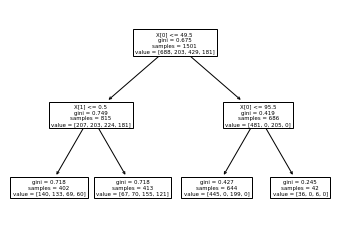

In [45]:
from sklearn.tree import plot_tree
plot_tree(pipeDT[1])  

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [47]:
data = pd.read_csv('SimulatedArticleData.csv', index_col=[0])
data.head()

,Gender,Age,Recommendation,Reward
0,m,29.0,health,0
1,m,28.0,movies,1
2,m,34.0,news,1
3,m,36.0,health,0
4,f,24.0,news,0


[]

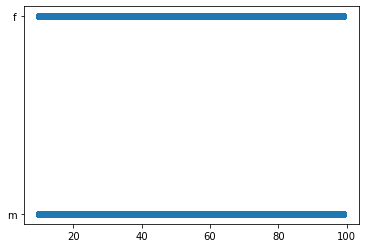

In [48]:
data_x = data[['Age']]
data_y = data['Gender']
plt.scatter(data_x, data_y)
plt.plot()

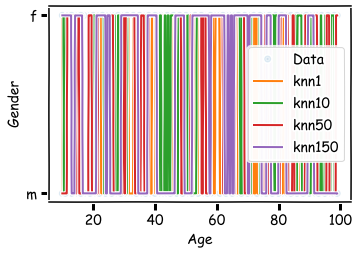

In [49]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn10 = KNeighborsClassifier(n_neighbors=10)
knn50 = KNeighborsClassifier(n_neighbors=50)
knn150 = KNeighborsClassifier(n_neighbors=150)

knn1.fit(data_x, data_y);
knn10.fit(data_x, data_y);
knn50.fit(data_x, data_y);
knn150.fit(data_x, data_y);


fig = plt.figure()
fig.patch.set_alpha(0.0)
plt.xkcd(scale=0.1, length=0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.16, right=0.86)


x=np.linspace(np.min(data_x),np.max(data_x),500)
yhat1 = knn1.predict(x)
yhat10 = knn10.predict(x)
yhat50 = knn50.predict(x)
yhat150 = knn150.predict(x)

plt.plot(data_x, data_y, 'o' ,alpha=0.1, label='Data')
plt.plot(x,yhat1, label='knn1')
plt.plot(x,yhat10, label='knn10')
plt.plot(x,yhat50, label='knn50')
plt.plot(x,yhat150, label='knn150')

plt.legend()

plt.xlabel("Age")
plt.ylabel("Gender")

plt.show()
